**The Notebook contains the code for Building Neural Network with the MNIST data**

1. The network architecture is built up on with basic functionalities without any usage of special features and functionalities. 
2. The network has many parameters (20,37,910) ~ 20 Lakh parameter, which makes it a heavier model. 
3. The Architecture only has Convolutions, Relu activation function, Max Pooling, and returning result with softmax, which returns a list of probabilites of classes.
4. The Receptive Field looks out a 32x32 at the end.
5. EPOCHS: Iterated the dataset for 20 times.
6. BATCHSIZE : 128 
7. Top 3 Accuracies: (Non-Overfitted Accuracies) 
    
    **1. Train: 99.99 Test: 99.24**

    **2. Train: 99.95 Test: 99.22**

    **3. Train: 98.93 Test: 98.97**

8. As per my view & visualizations, the model's accuracy & loss dips at a point and regain the previous accuracy score, it might be because of back-to-back pooling layers where in between there is a only convolutional.**Changes happens at EPOCH (1,2,15,16)**


**A. Importing Libraries**

In [27]:
from __future__ import print_function
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets,transforms

In [3]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**B. Dataloader/ Loading the data**

In [4]:
# Defining transformations such that our data can be transformed in such a way 

train_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
test_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

In [5]:
train = datasets.MNIST("./data",train=True,download=True,transform=train_transforms)
test = datasets.MNIST("./data",train=False,download=True,transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**C. Setting Configurations for processors & dataloading**

In [12]:
SEED = 1 
gpu = torch.cuda.is_available()
print("Is cuda available: ",gpu)
torch.manual_seed(SEED)

if gpu:
  torch.cuda.manual_seed(SEED)

dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if gpu else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

Is cuda available:  True


**D. Visualization & understanding of Images**

torch.Size([128, 1, 28, 28]) torch.Size([128])


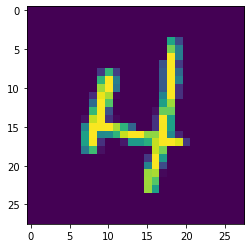

In [13]:
images,labels = next(iter(train_loader))
print(images.shape,labels.shape)
plt.imshow(images[0].numpy().squeeze())

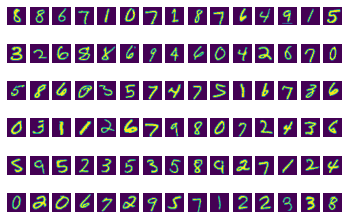

In [15]:
figure = plt.figure() 
for idx in range(1,91):
  plt.subplot(6,15,idx)
  plt.axis('off')
  plt.imshow(images[idx].numpy().squeeze())

**E. Building Model Architecture**

In [57]:
## creating Neural Network Architecture

class Setup(nn.Module):
  def __init__(self):
    super(Setup,self).__init__()

    self.convblock1 = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=32,kernel_size=(3,3),padding=1), 
        nn.ReLU())
    # 28 -> 30 --> 28 | RF : 3

    
    self.convblock2 = nn.Sequential(
        nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3),padding=1),
        nn.ReLU()) 
    # 28 -> 30 -> 28 | RF: 5

    
    self.pool1 = nn.MaxPool2d(2,2)
    # 28 -> 14  | RF: 10
    self.convblock3 = nn.Sequential(
        nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),padding=1),
        nn.ReLU()
    )
    # 14 -> 16 -> 14 | RF: 12 
    
    self.pool1 = nn.MaxPool2d(2,2)
    # 14 -> 7 | RF: 24 

    self.convblock4 = nn.Sequential(
        nn.Conv2d(in_channels=128,out_channels=256,kernel_size=(3,3),padding=1),
        nn.ReLU()
    )
    # 7 -> 9 -> 7 | RF: 26 
    self.convblock5 = nn.Sequential(
        nn.Conv2d(in_channels=256,out_channels=512,kernel_size=(3,3)),
        nn.ReLU()
    )
    # 7 -> 5  | RF: 28 

    
    self.convblock6 = nn.Sequential(
        nn.Conv2d(in_channels=512,out_channels=100,kernel_size=(3,3)),
        nn.ReLU()
    )
    # 5 -> 3 | RF: 30 
    self.convblock7 = nn.Sequential(
        nn.Conv2d(in_channels=100,out_channels=10,kernel_size=(3,3))
    )


    self.pool1 = nn.MaxPool2d(2,2)

  def forward(self,x):
    x = self.convblock1(x)
    x = self.convblock2(x)
    x = self.pool1(x)
    x = self.convblock3(x)
    x = self.pool1(x)
    x = self.convblock4(x)
    x = self.convblock5(x)
    x = self.convblock6(x)
    x = self.convblock7(x)
    x = x.view(-1,10)
    return F.log_softmax(x,dim=-1)

### Model Design: 

1. Block1: Image = (28,28) with padding makes Image = (30,30)  
           Parameters = (3*3*1+1)*32 = 32*10 = 320 
           Output Image = (28,28) 
           Receptive Field = (3,3) 
2. Block2: Image = Block1 ouptut Image (28,28) with padding makes Image = (30,30)
           Paramters = (3*3*32+1)*64 = 321*64 = 18496 
           OutputImage = (28,28) 
           Receptive Field = (5,5)
**Pooling Layer**:
           Output Image = (14,14)
           Receptive Field = (10,10)

3. Block3: Image = Block2 ouptut Image (14,14) with padding makes Image = (16,16)
           Paramters = (3*3*64+1)*128 = 577*128 = 73856
           OutputImage = (14,14) 
           Receptive Field = (12,12)
**Pooling Layer**:
           Output Image = (7,7)
           Receptive Field = (24,24)

4. Block4: Image = Block3 ouptut Image (7,7) with padding makes Image = (9,9)
           Paramters = (3*3*128+1)*256 = 1152*256 = 295168
           OutputImage = (7,7)
           Receptive Field = (26,26)

5. Block5: Image = Block4 ouptut Image (7,7) 
           Paramters = (3*3*256+1)*512 = 2305*512 = 1180160
           OutputImage = (5,5)
           Receptive Field = (28,28)

6. Block6: Image = Block5 ouptut Image (5,5) 
           Paramters = (3*3*512+1)*100 = 4609*100 = 460900
           OutputImage = (3,3) 
           Receptive Field = (30,30)

7. Block6: Image = Block5 ouptut Image (3,3) 
           Paramters = (3*3*100+1)*10 = 901*10 = 9010
           OutputImage = (1,1)
           Receptive Field = (32,32)

           

           

**F.Understanding the summary of Architecture**

In [58]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Setup().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 64, 28, 28]          18,496
              ReLU-4           [-1, 64, 28, 28]               0
         MaxPool2d-5           [-1, 64, 14, 14]               0
            Conv2d-6          [-1, 128, 14, 14]          73,856
              ReLU-7          [-1, 128, 14, 14]               0
         MaxPool2d-8            [-1, 128, 7, 7]               0
            Conv2d-9            [-1, 256, 7, 7]         295,168
             ReLU-10            [-1, 256, 7, 7]               0
           Conv2d-11            [-1, 512, 5, 5]       1,180,160
             ReLU-12            [-1, 512, 5, 5]               0

**G. Defining & deriving the training & its results as well as test/validation results**

In [64]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)
    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} train-Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, val-Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [66]:
model =  Setup().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.08130256086587906 Batch_id=468 train-Accuracy=83.11: 100%|██████████| 469/469 [00:15<00:00, 30.11it/s]



Test set: Average loss: 0.0640, val-Accuracy: 9789/10000 (97.89%)

EPOCH: 1


Loss=0.2561770975589752 Batch_id=468 train-Accuracy=97.84: 100%|██████████| 469/469 [00:14<00:00, 31.73it/s]



Test set: Average loss: 0.0448, val-Accuracy: 9850/10000 (98.50%)

EPOCH: 2


Loss=0.011388125829398632 Batch_id=468 train-Accuracy=98.54: 100%|██████████| 469/469 [00:15<00:00, 30.93it/s]



Test set: Average loss: 0.0374, val-Accuracy: 9884/10000 (98.84%)

EPOCH: 3


Loss=0.009458309970796108 Batch_id=468 train-Accuracy=98.93: 100%|██████████| 469/469 [00:14<00:00, 31.57it/s]



Test set: Average loss: 0.0312, val-Accuracy: 9897/10000 (98.97%)

EPOCH: 4


Loss=0.056353017687797546 Batch_id=468 train-Accuracy=99.17: 100%|██████████| 469/469 [00:14<00:00, 31.69it/s]



Test set: Average loss: 0.0321, val-Accuracy: 9891/10000 (98.91%)

EPOCH: 5


Loss=0.02907305210828781 Batch_id=468 train-Accuracy=99.37: 100%|██████████| 469/469 [00:14<00:00, 31.99it/s]



Test set: Average loss: 0.0310, val-Accuracy: 9902/10000 (99.02%)

EPOCH: 6


Loss=0.017787231132388115 Batch_id=468 train-Accuracy=99.50: 100%|██████████| 469/469 [00:14<00:00, 31.80it/s]



Test set: Average loss: 0.0276, val-Accuracy: 9908/10000 (99.08%)

EPOCH: 7


Loss=0.001018950599245727 Batch_id=468 train-Accuracy=99.58: 100%|██████████| 469/469 [00:14<00:00, 32.25it/s]



Test set: Average loss: 0.0327, val-Accuracy: 9903/10000 (99.03%)

EPOCH: 8


Loss=0.0029887647833675146 Batch_id=468 train-Accuracy=99.62: 100%|██████████| 469/469 [00:14<00:00, 31.47it/s]



Test set: Average loss: 0.0380, val-Accuracy: 9895/10000 (98.95%)

EPOCH: 9


Loss=0.002230748301371932 Batch_id=468 train-Accuracy=99.72: 100%|██████████| 469/469 [00:15<00:00, 29.93it/s]



Test set: Average loss: 0.0298, val-Accuracy: 9907/10000 (99.07%)

EPOCH: 10


Loss=0.004629060160368681 Batch_id=468 train-Accuracy=99.81: 100%|██████████| 469/469 [00:14<00:00, 31.89it/s]



Test set: Average loss: 0.0327, val-Accuracy: 9917/10000 (99.17%)

EPOCH: 11


Loss=0.0006871791556477547 Batch_id=468 train-Accuracy=99.82: 100%|██████████| 469/469 [00:15<00:00, 30.47it/s]



Test set: Average loss: 0.0355, val-Accuracy: 9912/10000 (99.12%)

EPOCH: 12


Loss=0.00010688500333344564 Batch_id=468 train-Accuracy=99.83: 100%|██████████| 469/469 [00:17<00:00, 27.22it/s]



Test set: Average loss: 0.0403, val-Accuracy: 9908/10000 (99.08%)

EPOCH: 13


Loss=0.0017425949918106198 Batch_id=468 train-Accuracy=99.87: 100%|██████████| 469/469 [00:16<00:00, 28.34it/s]



Test set: Average loss: 0.0309, val-Accuracy: 9922/10000 (99.22%)

EPOCH: 14


Loss=0.0018519139848649502 Batch_id=468 train-Accuracy=99.86: 100%|██████████| 469/469 [00:14<00:00, 31.45it/s]



Test set: Average loss: 0.0361, val-Accuracy: 9908/10000 (99.08%)

EPOCH: 15


Loss=0.019678542390465736 Batch_id=468 train-Accuracy=99.90: 100%|██████████| 469/469 [00:17<00:00, 26.98it/s]



Test set: Average loss: 0.0430, val-Accuracy: 9898/10000 (98.98%)

EPOCH: 16


Loss=0.04344753921031952 Batch_id=468 train-Accuracy=99.90: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]



Test set: Average loss: 0.0366, val-Accuracy: 9905/10000 (99.05%)

EPOCH: 17


Loss=0.0010756817646324635 Batch_id=468 train-Accuracy=99.92: 100%|██████████| 469/469 [00:17<00:00, 27.50it/s]



Test set: Average loss: 0.0382, val-Accuracy: 9913/10000 (99.13%)

EPOCH: 18


Loss=0.0004848582611884922 Batch_id=468 train-Accuracy=99.95: 100%|██████████| 469/469 [00:16<00:00, 28.60it/s]



Test set: Average loss: 0.0360, val-Accuracy: 9922/10000 (99.22%)

EPOCH: 19


Loss=0.0029406005050987005 Batch_id=468 train-Accuracy=99.99: 100%|██████████| 469/469 [00:16<00:00, 28.79it/s]



Test set: Average loss: 0.0393, val-Accuracy: 9924/10000 (99.24%)



Text(0.5, 1.0, 'Test Accuracy')

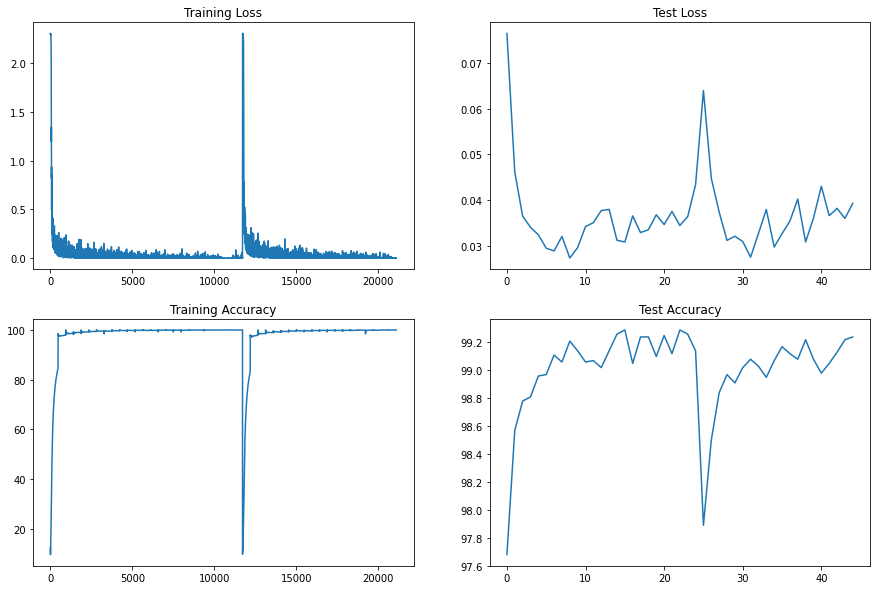

In [69]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.cpu().item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [67]:
print("Done!")

Done!


In [70]:
print("Lets make the model slimer in the next step and make the accuracy and losses not to dip/gain")

Lets make the model slimer in the next step and make the accuracy and losses not to dip/gain
